# Tutorial

## Computing contours of a custom function
The function defines a 3d surface, for which we will compute its contours.

We start by importing our library and some plotting functions.

In [1]:
import numpy as np

from fermi_contours import marching_squares as ms

from matplotlib import pyplot as plt
from matplotlib import colors
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [2]:
def plot_contours(squares, levels, contours, cmap=None, background_cmap="Blues"):
    if cmap is None:
        cmap = plt.cm.Oranges

    fig = plt.figure(figsize=plt.figaspect(2))
    ax1 = fig.add_subplot(2, 1, 1)
    ax2 = fig.add_subplot(2, 1, 2, projection='3d', computed_zorder=False)

    # 2d axis

    n = len(levels)
    color_list = cmap(np.linspace(0, 1, n))
    norm = colors.Normalize(vmin=min(levels), vmax=max(levels))

    divider = make_axes_locatable(ax1)
    cax1 = divider.new_horizontal(size="5%", pad=0.2)
    fig.add_axes(cax1)
    fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax1)
    X, Y = np.meshgrid(*squares.grid_points)
    ax1.pcolormesh(X, Y, squares.grid_values.T, cmap=background_cmap);



    for i, contours_per_level in enumerate(contours):
        for contour in contours_per_level:

            ax1.plot(*np.array(contour).T, color=color_list[i])



    # 3d axis
    X, Y = np.meshgrid(*squares.grid_points)
    ax2.plot_surface(X, Y, squares.grid_values.T, alpha=1, cmap=background_cmap)
    ax2.view_init(azim=-80, elev=20)


    for i, (level, contours_per_level) in enumerate(zip(levels, contours)):
        for contour in contours_per_level:
            if len(contour) > 0:
                _x, _y = np.array(contour)[None, :].T
                _z = np.ones(len(_x))[:, None] * level
                ax2.plot(_x, _y, _z, color=color_list[i])

    return fig, ax1, ax2


The custom function can be anything that takes two floats and returns another float.
If the function is expensive to compute in a serial way, consider computing the `grid_values` elsewhere, and provide the values instead of the function.

In [3]:
def surface(x, y):
    return x ** 2 + y ** 2


To instantiate our `MarchingSquares` class, we need to provide the bounds of the grid. These bounds will be used to scale the position of the contours.

In [4]:
squares = ms.MarchingSquares(
    func=surface,
    res=[20, 10],
    bounds=[[-2,2], [-1, 1]],
)


At this point, the `squares` instance has extracted the `grid_points` and their `grid_values`.
If these are not provided, the `grid_points` are computed them using the `res` and `bounds` parameters, and the `grid_values` are the evaluations of `func` on those points.

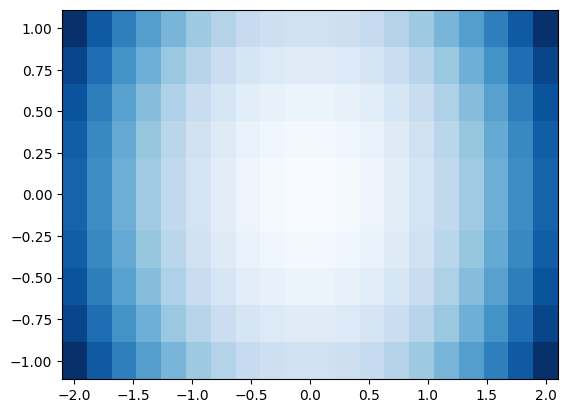

In [5]:
X, Y = np.meshgrid(*squares.grid_points)
plt.pcolormesh(X, Y, squares.grid_values.T, cmap="Blues");


### Computing contours
Now, we just call our instance with the values of the levels for which we want to compute the contour.

In [6]:
levels = np.linspace(0, 1, 21)
levels


array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [7]:
contours = [squares(l) for l in levels]


To visualize the contours, we can plot the `grid_values` in blue, and the set of contours in orange.

(<Figure size 400x800 with 3 Axes>, <Axes: >, <Axes3D: >)

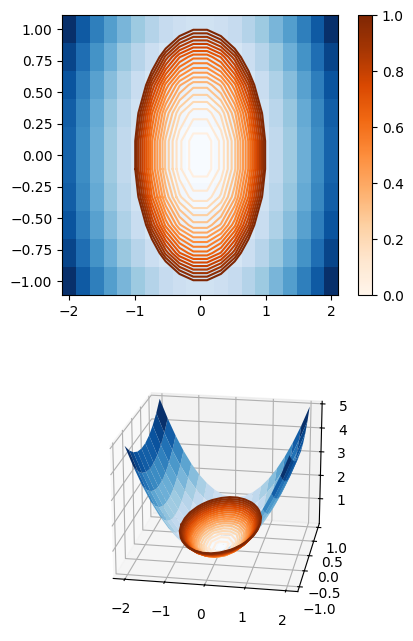

In [8]:
plot_contours(squares, levels=levels, contours=contours)


## Special cases

### Open contours

It may happen that our contour is not closed, or at least not within the bounds that we want.
In this case, we can set the parameter `open_contours=True` to allow this behaviour.
This can also lead to more than one contour per level


In [9]:
levels_open = np.linspace(0, 5, 21)
levels_open


array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
       2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ])

In [10]:
contours_open = [squares(l) for l in levels_open]


To visualize the contours, we can plot the `grid_values` in blue, and the set of contours in orange.

In [ ]:
plot_contours(squares, levels=levels_open, contours=contours_open)


### Periodic boundaries
If we want that contours wrap around the edges of our grid, we can set the parameter `periodic=True`.

To make use of this functionality, let's define a periodic function and plot the contours.

In [ ]:
def surface_periodic(x, y):
    period = np.pi
    return np.sin(period * x / 2) + np.sin(period * y )


In [ ]:
squares_periodic = ms.MarchingSquares(
    func=surface_periodic,
    res=[20, 10],
    bounds=[[-2,2], [-1, 1]],
    periodic=False,
)


In [ ]:
levels_periodic = np.linspace(-2, 2, 21)
levels_periodic


In [ ]:
contours_periodic = [squares_periodic(l) for l in levels_periodic]


In [ ]:
plot_contours(squares_periodic, levels=levels_periodic, contours=contours_periodic, cmap=plt.cm.PuOr)
